# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
cities_df = pd.DataFrame({'cities':cities})
# Print the city count to confirm sufficient count
print(len(cities))

602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Fahrenheit

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_list = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country=[]
date = []

In [4]:
record=0

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_list.append(city)
        record += 1
        print(f"Processing Record {record} for city = {city}")
        time.sleep(1)
    except KeyError:
        print("City not found...skipping record")

Processing Record 1 for city = mar del plata
Processing Record 2 for city = bredasdorp
City not found...skipping record
Processing Record 3 for city = mataura
Processing Record 4 for city = kavieng
Processing Record 5 for city = jieshi
Processing Record 6 for city = vao
Processing Record 7 for city = basco
Processing Record 8 for city = toribio
Processing Record 9 for city = ribeira grande
Processing Record 10 for city = cabo san lucas
Processing Record 11 for city = bengkulu
Processing Record 12 for city = tezu
Processing Record 13 for city = bubaque
Processing Record 14 for city = victoria
Processing Record 15 for city = tolaga bay
Processing Record 16 for city = saint-louis
Processing Record 17 for city = santa lucia
Processing Record 18 for city = port alfred
Processing Record 19 for city = ushuaia
Processing Record 20 for city = shu
Processing Record 21 for city = hilo
Processing Record 22 for city = dikson
Processing Record 23 for city = kenai
Processing Record 24 for city = band

Processing Record 182 for city = guerrero negro
Processing Record 183 for city = luderitz
City not found...skipping record
Processing Record 184 for city = smolyaninovo
City not found...skipping record
Processing Record 185 for city = roebourne
Processing Record 186 for city = byron bay
Processing Record 187 for city = verkhnyaya inta
Processing Record 188 for city = hermanus
Processing Record 189 for city = oktyabrskoye
Processing Record 190 for city = touros
Processing Record 191 for city = halapitan
City not found...skipping record
Processing Record 192 for city = karlstad
Processing Record 193 for city = ribeira brava
Processing Record 194 for city = saurimo
Processing Record 195 for city = georgetown
Processing Record 196 for city = zakamensk
Processing Record 197 for city = imbituba
Processing Record 198 for city = mount isa
Processing Record 199 for city = chauny
Processing Record 200 for city = preobrazheniye
Processing Record 201 for city = longyearbyen
Processing Record 202 f

Processing Record 366 for city = aykhal
Processing Record 367 for city = tikaitnagar
Processing Record 368 for city = ahipara
Processing Record 369 for city = pedernales
City not found...skipping record
City not found...skipping record
Processing Record 370 for city = mancora
Processing Record 371 for city = hofn
Processing Record 372 for city = waipawa
Processing Record 373 for city = jalu
Processing Record 374 for city = powassan
Processing Record 375 for city = san ignacio
Processing Record 376 for city = beian
Processing Record 377 for city = soyo
Processing Record 378 for city = tocopilla
Processing Record 379 for city = suicheng
Processing Record 380 for city = korla
City not found...skipping record
Processing Record 381 for city = asau
City not found...skipping record
Processing Record 382 for city = marawi
Processing Record 383 for city = ostrovnoy
Processing Record 384 for city = alofi
Processing Record 385 for city = ishinomaki
Processing Record 386 for city = agadez
Processi

Processing Record 550 for city = glace bay
Processing Record 551 for city = saint-joseph
Processing Record 552 for city = yulara
Processing Record 553 for city = tuy hoa
Processing Record 554 for city = rio verde de mato grosso


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": cities_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.to_csv(r'weather_data.csv',index=False)
len(weather_data_df)

554

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_value = 100
weather_data_df.index[weather_data_df["Humidity"] > humidity_value]

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data_humidity_df = weather_data_df[weather_data_df["Humidity"] > humidity_value]
clean_city_df = weather_data_df.drop(weather_data_humidity_df.index, inplace=False)
print(len(weather_data_humidity_df))
clean_city_df

0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,75.00,69,75,16.11,AR,1607455285
1,bredasdorp,-34.53,20.04,64.40,88,4,14.99,ZA,1607455416
2,mataura,-46.19,168.86,57.99,69,86,5.01,NZ,1607455417
3,kavieng,-2.57,150.80,82.40,72,100,4.99,PG,1607455418
4,jieshi,22.81,115.83,64.00,69,70,1.01,CN,1607455419
...,...,...,...,...,...,...,...,...,...
549,glace bay,46.20,-59.96,39.00,93,90,16.11,CA,1607456067
550,saint-joseph,-21.37,55.62,75.20,73,90,21.92,RE,1607456068
551,yulara,-25.24,130.99,77.00,17,100,10.29,AU,1607456070
552,tuy hoa,13.08,109.30,70.65,91,100,9.93,VN,1607456071


In [8]:
#Prep to plot data
date_of_analysis = clean_city_df.iloc[0,8]
date_of_analysis = datetime.utcfromtimestamp(date_of_analysis).strftime('%m/%d/%y')
date_of_analysis

'12/08/20'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

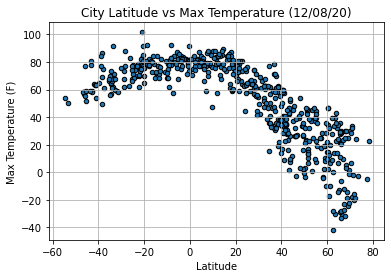

<Figure size 432x288 with 0 Axes>

In [9]:
clean_city_df.plot(kind="scatter", y='Max Temp', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Max Temperature ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig('Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

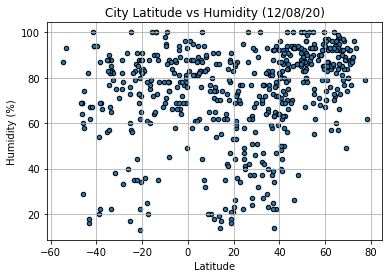

<Figure size 432x288 with 0 Axes>

In [10]:
clean_city_df.plot(kind="scatter", y='Humidity', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Humidity ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

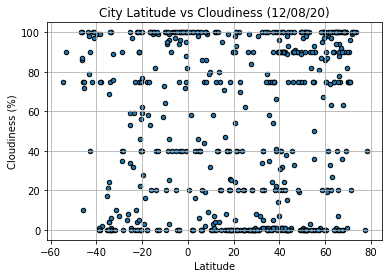

<Figure size 432x288 with 0 Axes>

In [11]:
clean_city_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Cloudiness ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig('Lat_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

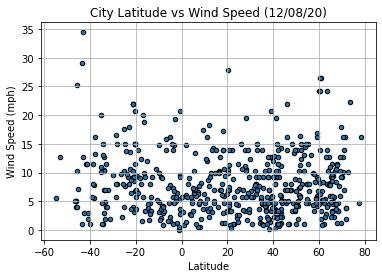

<Figure size 432x288 with 0 Axes>

In [12]:
clean_city_df.plot(kind="scatter", y='Wind Speed', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Wind Speed ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('Lat_vs_WindSpeed.png')

## Linear Regression

In [13]:
#create new df & prep for plotting below
bins = [-90,0,90]
hemisphere_range = ["Southern","Northern"]
clean_city_df["Hemisphere"] = pd.cut(clean_city_df["Lat"], bins,labels=hemisphere_range)
clean_city_north_df = clean_city_df.loc[clean_city_df["Hemisphere"] == "Northern"]
clean_city_south_df = clean_city_df.loc[clean_city_df["Hemisphere"] == "Southern"]
#check that bin & cut captured all records between hemispheres
print(len(clean_city_south_df)+len(clean_city_north_df)-len(clean_city_df))

0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8493880045728145


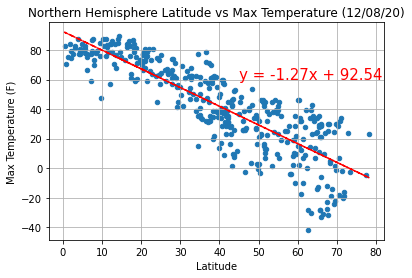

<Figure size 432x288 with 0 Axes>

In [26]:
nt_lat = clean_city_north_df['Lat']
nt_maxtemp = clean_city_north_df['Max Temp']

nt_slope, nt_int, nt_r, nt_p, nt_std_err = linregress(nt_lat,nt_maxtemp)
nt_fit = nt_slope * nt_lat + nt_int

clean_city_north_df.plot(kind="scatter", y='Max Temp', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Max Temperature ({date_of_analysis})")

plt.plot(nt_lat,nt_fit,"--",color="red")
line_eq_nt = "y = " + str(round(nt_slope,2)) + "x + " + str(round(nt_int,2))
plt.annotate(line_eq_nt,(45,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {nt_r}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6084973405113644


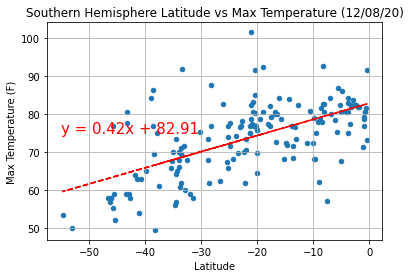

<Figure size 432x288 with 0 Axes>

In [30]:
st_slope, st_int, st_r, st_p, st_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Max Temp'])
st_fit = st_slope * clean_city_south_df['Lat'] + st_int

clean_city_south_df.plot(kind="scatter", y='Max Temp', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Max Temperature ({date_of_analysis})")

plt.plot(clean_city_south_df['Lat'],st_fit,"--",color="red")
line_eq_st = "y = " + str(round(st_slope,2)) + "x + " + str(round(st_int,2))
plt.annotate(line_eq_st,(-55,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {st_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3756618483877686


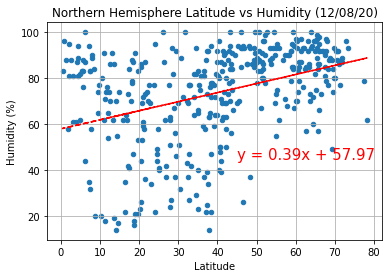

<Figure size 432x288 with 0 Axes>

In [33]:
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(clean_city_north_df['Lat'],clean_city_north_df['Humidity'])
nh_fit = nh_slope * clean_city_north_df['Lat'] + nh_int

clean_city_north_df.plot(kind="scatter", y='Humidity', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Humidity ({date_of_analysis})")

plt.plot(clean_city_north_df['Lat'],nh_fit,"--",color="red")
line_eq_nh = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq_nh,(45,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {nh_r}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1803261923987244


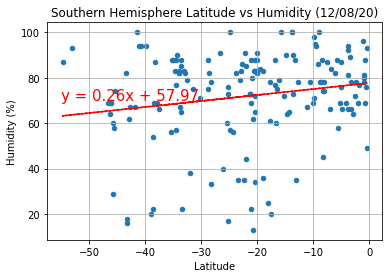

<Figure size 432x288 with 0 Axes>

In [38]:
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Humidity'])
sh_fit = sh_slope * clean_city_south_df['Lat'] + sh_int

clean_city_south_df.plot(kind="scatter", y='Humidity', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Humidity ({date_of_analysis})")

plt.plot(clean_city_south_df['Lat'],sh_fit,"--",color="red")
line_eq_sh = "y = " + str(round(sh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq_sh,(-55,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {sh_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22503119140393826


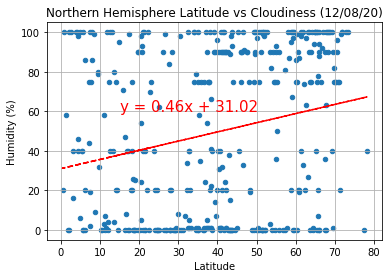

<Figure size 432x288 with 0 Axes>

In [41]:
nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(clean_city_north_df['Lat'],clean_city_north_df['Cloudiness'])
nc_fit = nc_slope * clean_city_north_df['Lat'] + nc_int

clean_city_north_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Cloudiness ({date_of_analysis})")

plt.plot(clean_city_north_df['Lat'],nc_fit,"--",color="red")
line_eq_nc = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_int,2))
plt.annotate(line_eq_nc,(15,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {nc_r}")
#print(f"The r-squared is: {nc_r**2}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1803261923987244


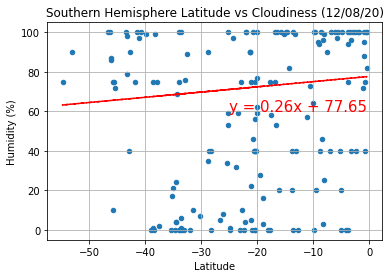

<Figure size 432x288 with 0 Axes>

In [43]:
sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Humidity'])
sc_fit = sc_slope * clean_city_south_df['Lat'] + sc_int

clean_city_south_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Cloudiness ({date_of_analysis})")

plt.plot(clean_city_south_df['Lat'],sc_fit,"--",color="red")
line_eq_sc = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_int,2))
plt.annotate(line_eq_sc,(-25,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {sc_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11979767170584606


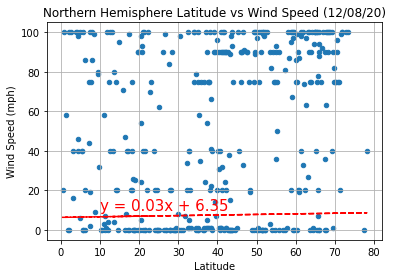

<Figure size 432x288 with 0 Axes>

In [44]:
nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(clean_city_north_df['Lat'],clean_city_north_df['Wind Speed'])
nw_fit = nw_slope * clean_city_north_df['Lat'] + nw_int

clean_city_north_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Wind Speed ({date_of_analysis})")

plt.plot(clean_city_north_df['Lat'],nw_fit,"--",color="red")
line_eq_nw = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_int,2))
plt.annotate(line_eq_nw,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {nw_r}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_WindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15537389209594232


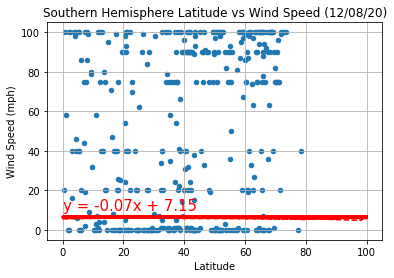

<Figure size 432x288 with 0 Axes>

In [21]:
sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Wind Speed'])
sw_fit = sw_slope * clean_city_south_df['Lat'] + sw_int

clean_city_north_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Wind Speed ({date_of_analysis})")

plt.plot(clean_city_south_df['Cloudiness'],sw_fit,"--",color="red")
line_eq_sw = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_int,2))
plt.annotate(line_eq_sw,(0,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {sw_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_WindSpeed.png')